<a href="https://colab.research.google.com/github/psy794/stock_pjtt/blob/master/XGBoost(0_61901)_%EC%BD%94%EB%93%9C%EC%A0%95%EB%A6%AC%ED%95%A0_%EC%88%98_%EC%9E%88%EC%9D%84%EA%B9%8C%3F_0720_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#구글드라이브를 mount해요

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
import pickle

#데이터 프레임을 불러옵니다

In [4]:
data = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/slow_k, slow_d,OBV추가피클/train_data_df_new.pkl', 'rb'))
data

,날짜,시가,고가,저가,종가,거래량,거래대금,등락률,종목코드,Close_mv5,...,snp500,nasdaq,semicon_index,euro50,us10y_tsy,fast_k,fast_d,시가총액,slow_k,slow_d
0,2021-06-01,2890,2970,2885,2920,166690,487455970,1.040000,060310,NaN,...,4202.04,13736.48,3174.32,4071.75,1.615,41.176471,41.176471,135112817960,41.176471,41.176471
1,2021-06-02,2915,2975,2830,2900,134833,388795625,-0.680000,060310,NaN,...,4208.12,13756.33,3196.98,4088.50,1.591,48.275862,45.436105,134187387700,45.436105,43.732252
2,2021-06-03,2900,2925,2875,2900,144470,419668300,0.000000,060310,NaN,...,4192.85,13614.51,3139.19,4079.24,1.625,48.275862,46.781253,134187387700,46.781253,45.176516
3,2021-06-04,2930,3120,2920,2950,934224,2840373820,1.720000,060310,NaN,...,4229.89,13814.49,3214.14,4089.38,1.560,41.379310,44.537369,136500963350,44.537369,44.911024
4,2021-06-07,3000,3150,2955,3150,946560,2929678225,6.780000,060310,2964.0,...,4226.52,13881.72,3191.66,4097.65,1.569,100.000000,65.828711,145755265950,65.828711,52.941037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987995,2023-05-23,6710,6710,6420,6430,40981,266207710,-4.170000,238490,6540.0,...,4145.58,12560.25,3177.44,4342.38,3.698,55.789474,64.061314,72737677480,64.061314,54.916390
987996,2023-05-24,6400,6490,6210,6320,19392,123635550,-1.710000,238490,6548.0,...,4115.24,12484.16,3124.09,4263.74,3.719,44.210526,57.444385,71493331520,57.444385,55.759055
987997,2023-05-25,6340,6400,6270,6330,6457,40862130,0.160000,238490,6502.0,...,4151.28,12698.09,3336.72,4269.64,3.814,45.263158,53.383976,71606453880,53.383976,54.967362
987998,2023-05-26,6330,6410,6300,6330,8905,56621540,0.000000,238490,6424.0,...,4205.45,12975.69,3545.67,4337.50,3.810,45.263158,50.677037,71606453880,50.677037,53.537253


In [10]:
data.columns

Index(['날짜', '시가', '고가', '저가', '종가', '거래량', '거래대금', '등락률', '종목코드', 'Close_mv5',
       'Close_mv10', 'Close_mv20', 'OBV', 'OBV_EMA', 'sse_composite_index',
       'csi300_index', 'usdtocny', 'eurtousd', 'msci_emerging', 'usdtoaud',
       'usdtojpy', 'usdtokrw', 'dow', 'snp500', 'nasdaq', 'semicon_index',
       'euro50', 'us10y_tsy', 'fast_k', 'fast_d', '시가총액', 'slow_k', 'slow_d'],
      dtype='object')

#2000개 종목중에 3개가지고만 그래프 그려보기  


*   피처중요도 0.1보다 큰것들만 피처로 사용
*   window_size = 5


*   RMSE는 작을수록 좋은것  

### 왜 후반부로 갈수록 예측종가와 실제종가 차이가 큰것인가.




RMSE for 060310: 235.31941090940268


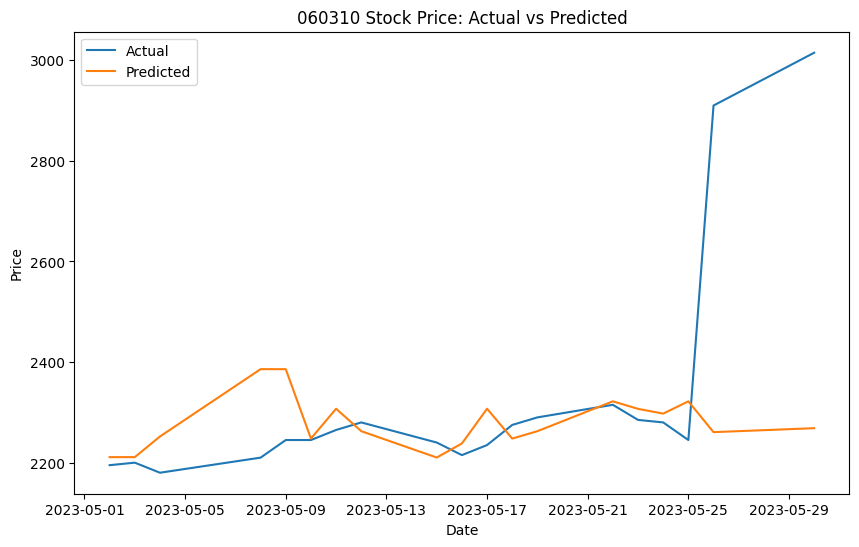

Comparison for 060310:
            Actual    Predicted
날짜                             
2023-05-02    2195  2210.995850
2023-05-03    2200  2210.995850
2023-05-04    2180  2252.034424
2023-05-08    2210  2385.897461
2023-05-09    2245  2385.897461
2023-05-10    2245  2247.875977
2023-05-11    2265  2307.194336
2023-05-12    2280  2262.600586
2023-05-15    2240  2210.197266
2023-05-16    2215  2238.171143
2023-05-17    2235  2307.194336
2023-05-18    2275  2247.875977
2023-05-19    2290  2262.600586
2023-05-22    2315  2321.907471
2023-05-23    2285  2306.974854
2023-05-24    2280  2297.514648
2023-05-25    2245  2321.907471
2023-05-26    2910  2260.676270
2023-05-30    3015  2268.552979
RMSE for 238490: 468.7926464656213


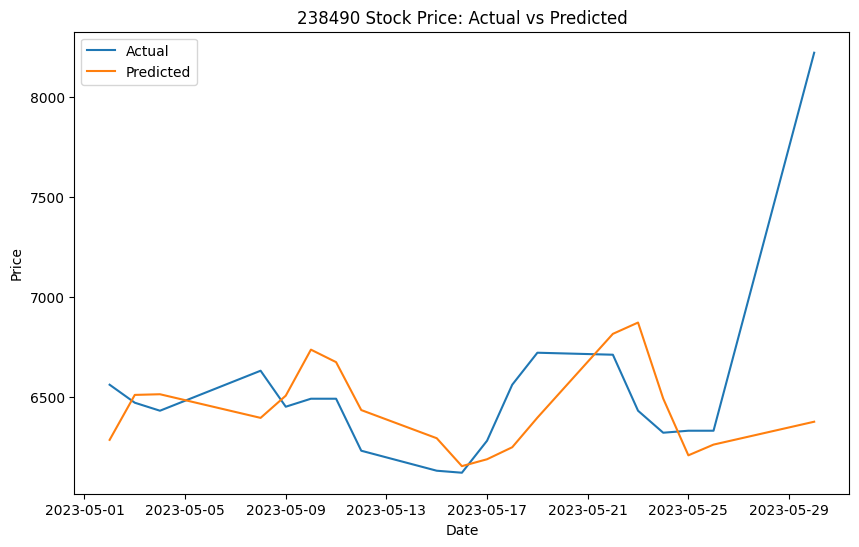

Comparison for 238490:
            Actual    Predicted
날짜                             
2023-05-02    6560  6284.274902
2023-05-03    6470  6509.061523
2023-05-04    6430  6512.394043
2023-05-08    6630  6394.210449
2023-05-09    6450  6505.233887
2023-05-10    6490  6735.370117
2023-05-11    6490  6672.905273
2023-05-12    6230  6433.285156
2023-05-15    6130  6292.456055
2023-05-16    6120  6152.909668
2023-05-17    6280  6187.392090
2023-05-18    6560  6247.381348
2023-05-19    6720  6395.284668
2023-05-22    6710  6814.321777
2023-05-23    6430  6870.868164
2023-05-24    6320  6490.836426
2023-05-25    6330  6206.960938
2023-05-26    6330  6260.605957
2023-05-30    8220  6375.011230
RMSE for 095570: 128.76491403512864


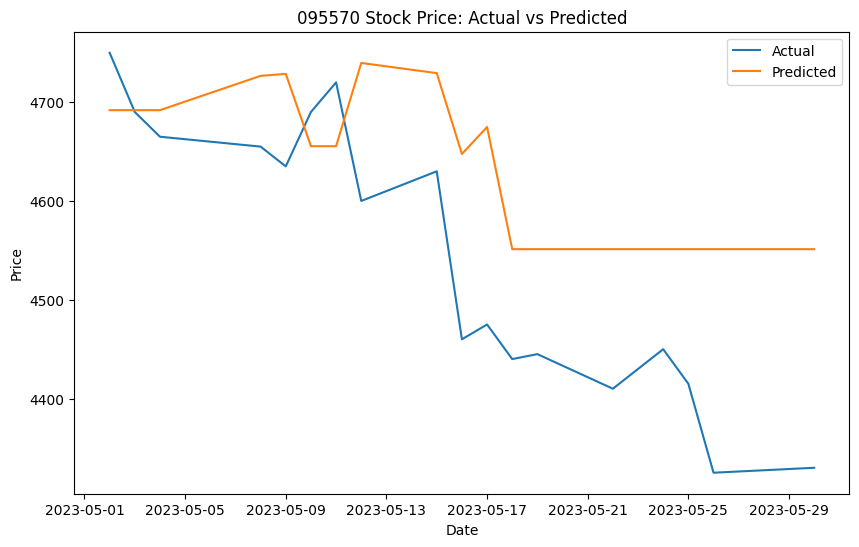

Comparison for 095570:
            Actual    Predicted
날짜                             
2023-05-02    4750  4691.875488
2023-05-03    4690  4691.875488
2023-05-04    4665  4691.875488
2023-05-08    4655  4726.584473
2023-05-09    4635  4728.613770
2023-05-10    4690  4655.405762
2023-05-11    4720  4655.405762
2023-05-12    4600  4739.631348
2023-05-15    4630  4729.374512
2023-05-16    4460  4647.523438
2023-05-17    4475  4674.842773
2023-05-18    4440  4551.214355
2023-05-19    4445  4551.214355
2023-05-22    4410  4551.214355
2023-05-23    4430  4551.214355
2023-05-24    4450  4551.214355
2023-05-25    4415  4551.214355
2023-05-26    4325  4551.214355
2023-05-30    4330  4551.214355


In [44]:
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel

codes = ['060310', '238490', '095570']
window_size = 2  # 윈도우 사이즈 설정

for code in codes:
    df = data[data['종목코드'] == code].copy()

    df['날짜'] = pd.to_datetime(df['날짜'])
    df.set_index('날짜', inplace=True)

    selected_vars = df[['시가', '고가', '저가', '종가', '거래량', '거래대금', '등락률', '종목코드', 'Close_mv5',
       'Close_mv10', 'Close_mv20', 'OBV', 'OBV_EMA', 'sse_composite_index',
       'csi300_index', 'usdtocny', 'eurtousd', 'msci_emerging', 'usdtoaud',
       'usdtojpy', 'usdtokrw', 'dow', 'snp500', 'nasdaq', 'semicon_index',
       'euro50', 'us10y_tsy', 'fast_k', 'fast_d', '시가총액', 'slow_k', 'slow_d']]

    # 윈도우 사이즈와 롤링 윈도우 적용
    moving_vars = selected_vars.rolling(window=window_size).mean().shift(1)
    moving_vars['종가'] = selected_vars['종가']

    moving_vars = moving_vars.dropna()

    train = moving_vars[moving_vars.index < '2023-05-01']
    test = moving_vars[(moving_vars.index >= '2023-05-01') & (moving_vars.index <= '2023-05-30')]

    X_train = train.drop('종가', axis=1)
    y_train = train['종가']
    X_test = test.drop('종가', axis=1)
    y_test = test['종가']

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = xgb.XGBRegressor(objective='reg:squarederror')
    model.fit(X_train_scaled, y_train)

    importance = model.feature_importances_

    selected_features = X_train.columns[importance > 0.1]
    select_X_train = X_train[selected_features]
    select_X_test = X_test[selected_features]

    model.fit(select_X_train, y_train)

    predictions = model.predict(select_X_test)

    rmse = sqrt(mean_squared_error(y_test, predictions))
    print(f'RMSE for {code}: {rmse}')

    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test.values, label='Actual')
    plt.plot(y_test.index, predictions, label='Predicted')
    plt.title(f'{code} Stock Price: Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # 테스트 데이터의 예측 종가와 실제 종가 비교 출력
    comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
    print(f'Comparison for {code}:\n{comparison}')


#window_size에 따른 변화 확인

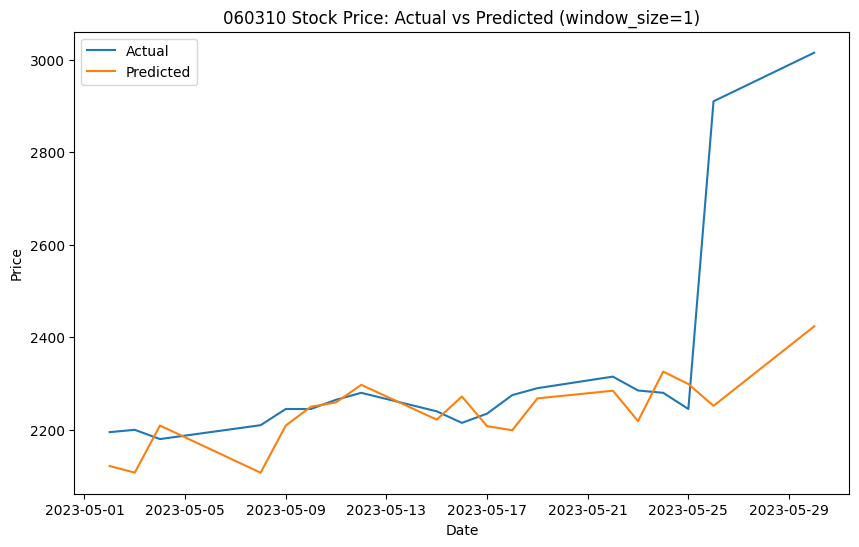

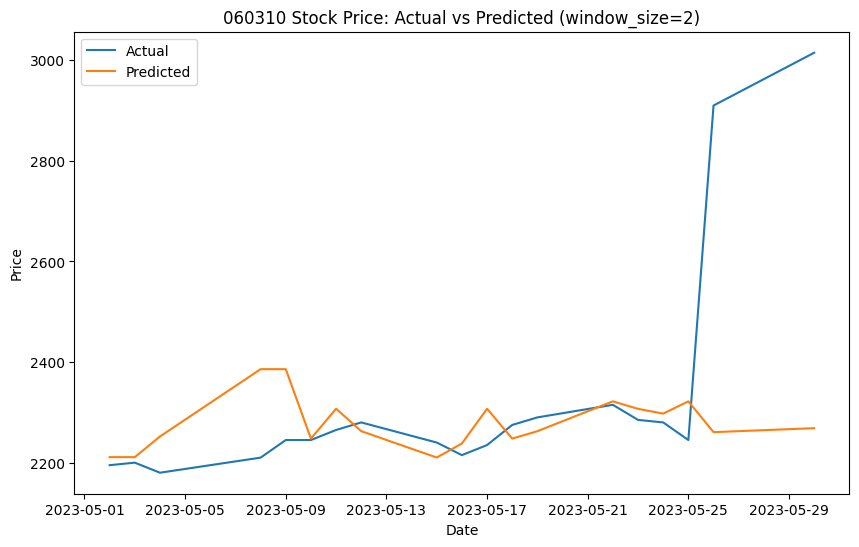

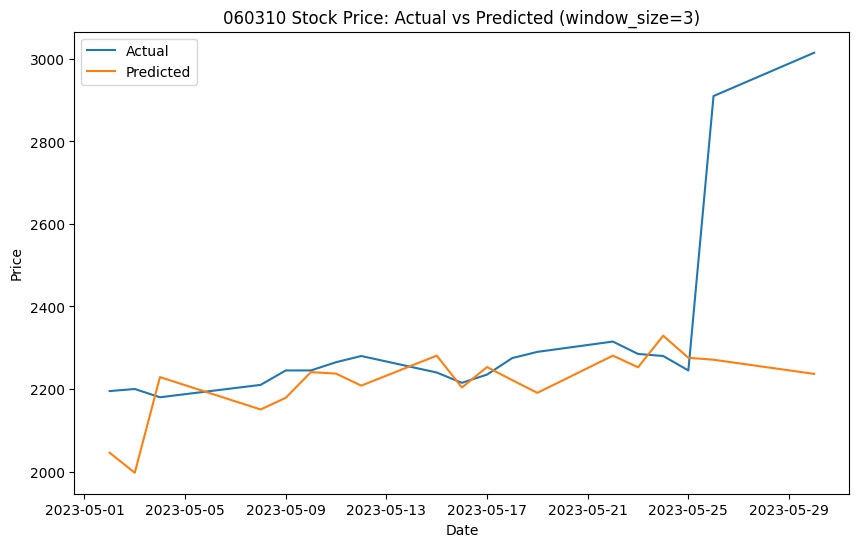

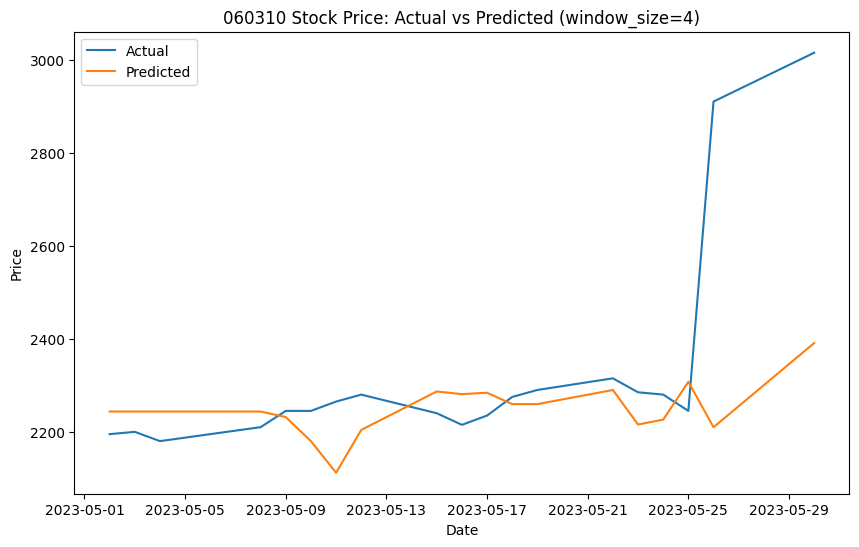

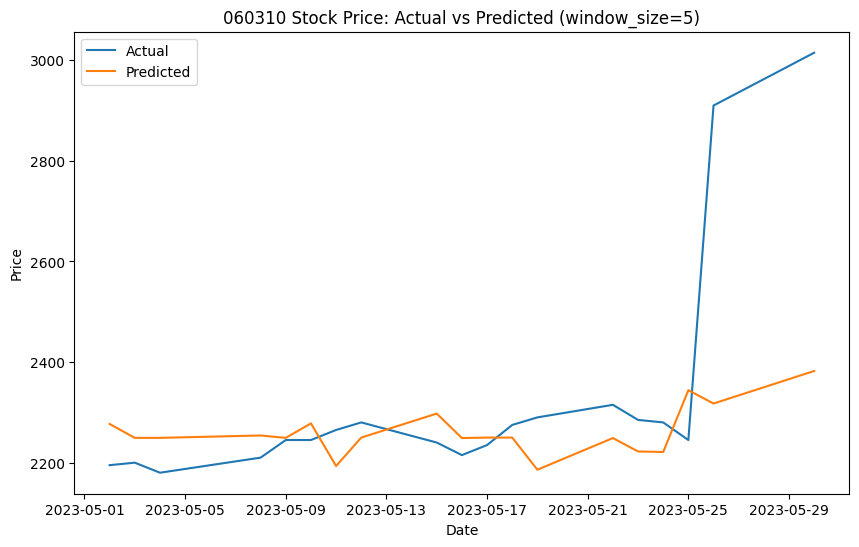

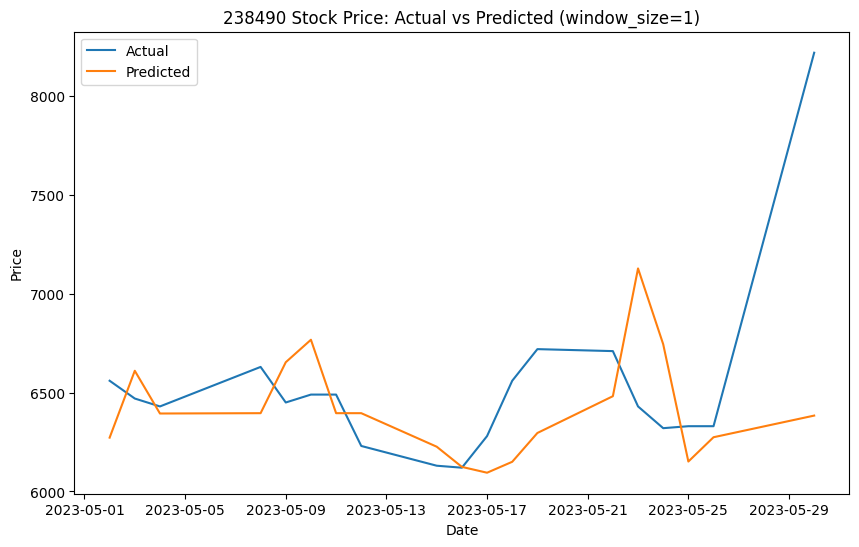

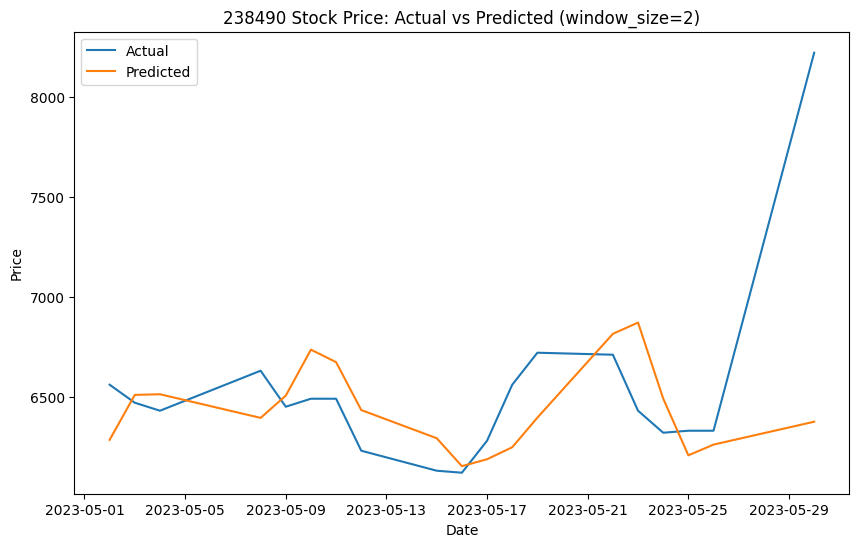

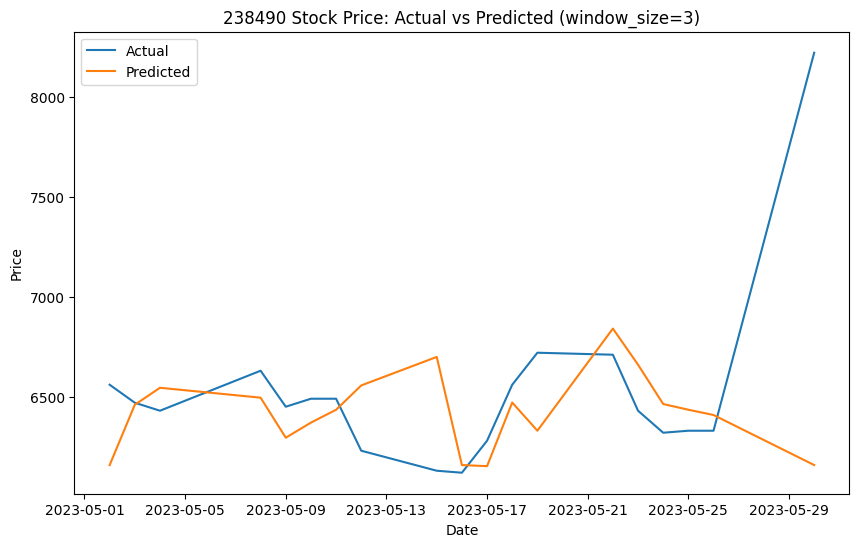

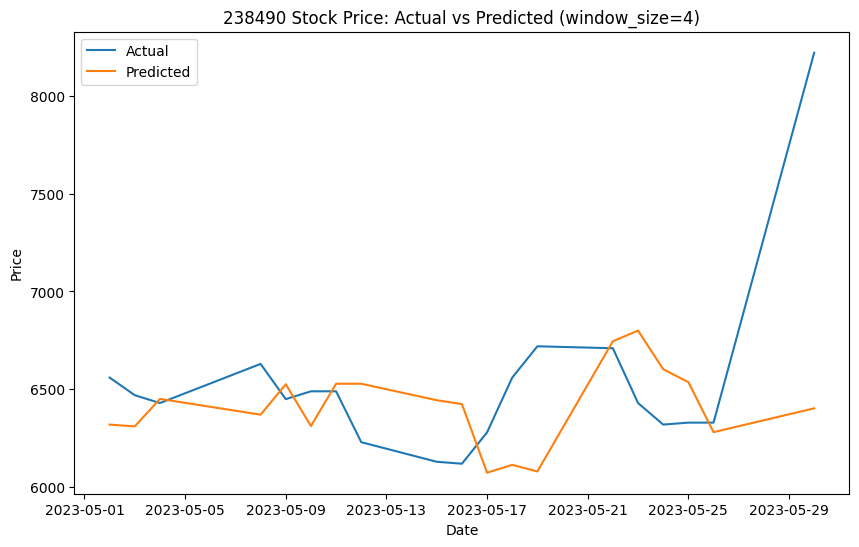

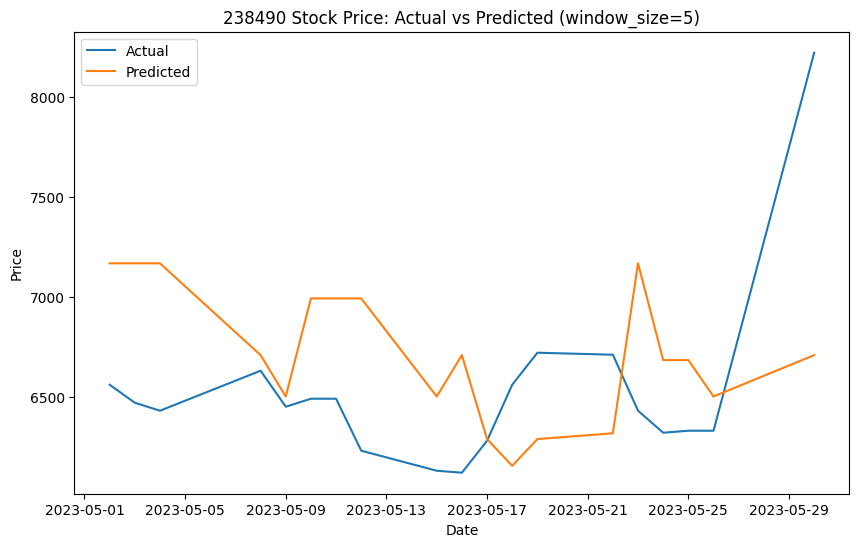

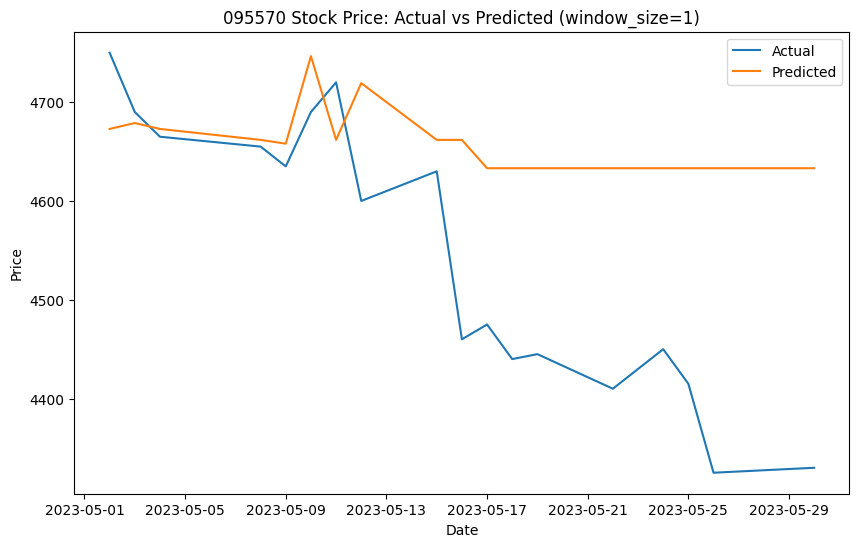

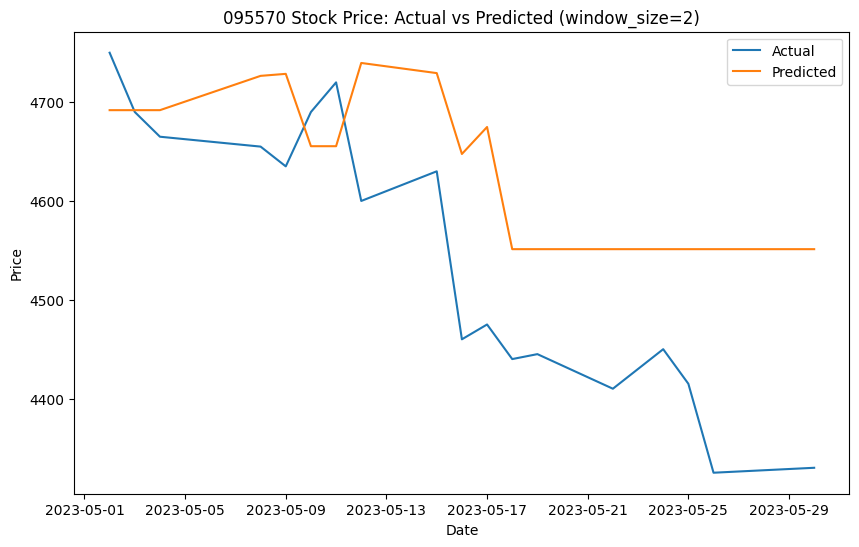

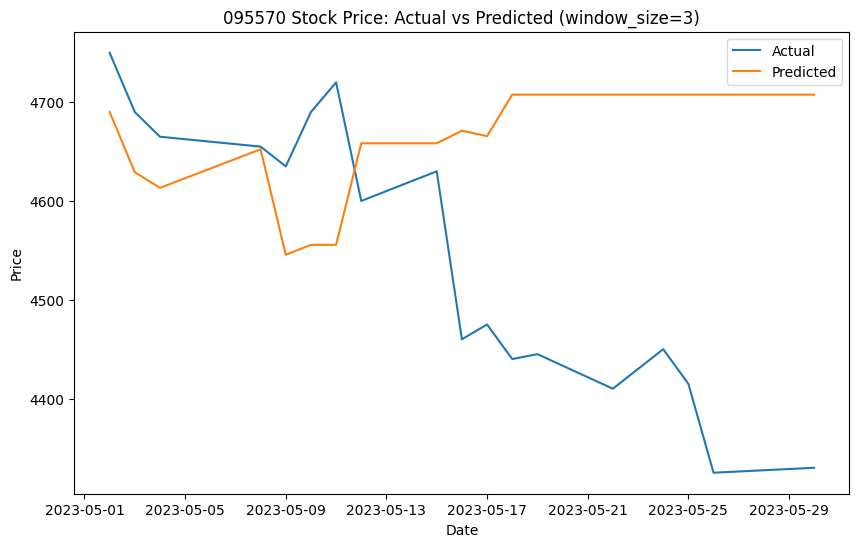

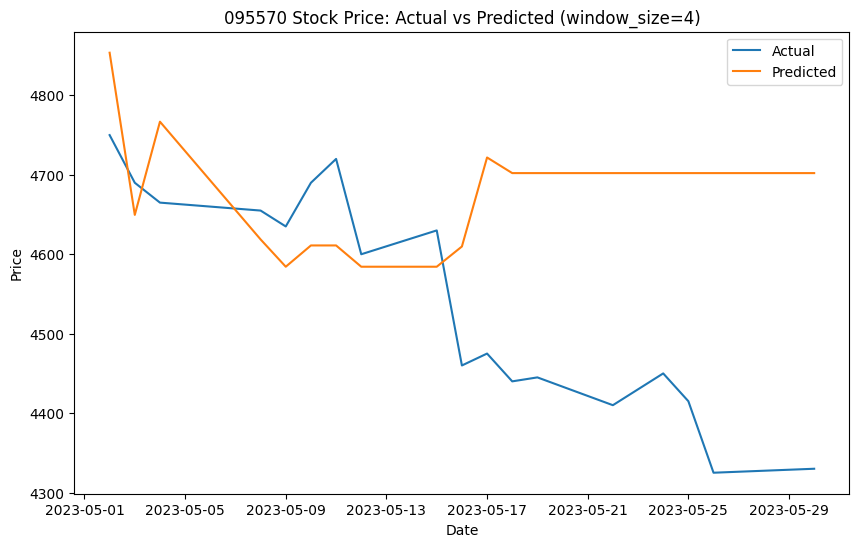

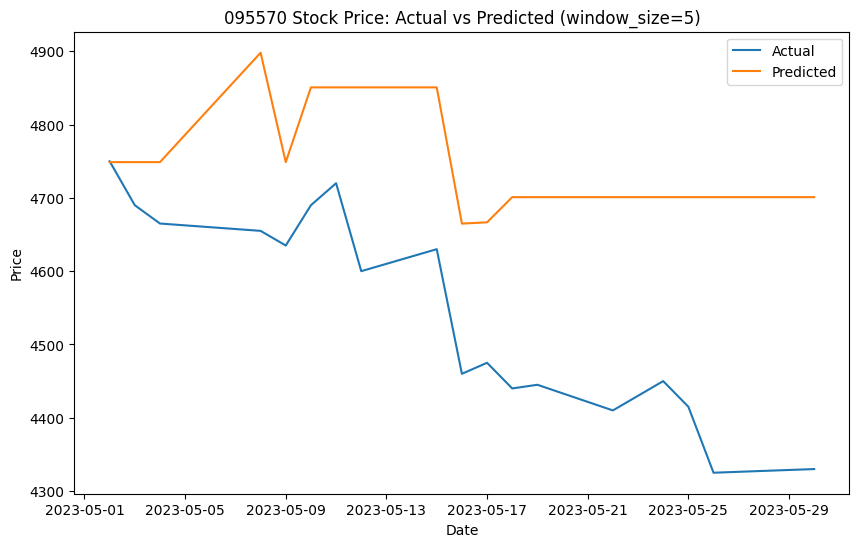

RMSE values for 060310:
Window Size 1: 209.09492205929175
Window Size 2: 235.31941090940268
Window Size 3: 242.18576889006505
Window Size 4: 223.03007117126054
Window Size 5: 206.74736334950083

RMSE values for 238490:
Window Size 1: 504.3399103943893
Window Size 2: 468.7926464656213
Window Size 3: 523.1802803770959
Window Size 4: 496.59831171682964
Window Size 5: 589.0965949673177

RMSE values for 095570:
Window Size 1: 166.37868698834964
Window Size 2: 128.76491403512864
Window Size 3: 217.06176527518315
Window Size 4: 211.69733840082336
Window Size 5: 232.98065929080155



In [46]:
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel

codes = ['060310', '238490', '095570']
window_sizes = [1, 2, 3, 4, 5]  # 다양한 윈도우 사이즈 설정
rmse_values = []  # RMSE 값을 저장할 리스트

for code in codes:
    df = data[data['종목코드'] == code].copy()

    df['날짜'] = pd.to_datetime(df['날짜'])
    df.set_index('날짜', inplace=True)

    selected_vars = df[['시가', '고가', '저가', '종가', '거래량', '거래대금', '등락률', '종목코드', 'Close_mv5',
       'Close_mv10', 'Close_mv20', 'OBV', 'OBV_EMA', 'sse_composite_index',
       'csi300_index', 'usdtocny', 'eurtousd', 'msci_emerging', 'usdtoaud',
       'usdtojpy', 'usdtokrw', 'dow', 'snp500', 'nasdaq', 'semicon_index',
       'euro50', 'us10y_tsy', 'fast_k', 'fast_d', '시가총액', 'slow_k', 'slow_d']]

    for window_size in window_sizes:
        # 윈도우 사이즈와 롤링 윈도우 적용
        moving_vars = selected_vars.rolling(window=window_size).mean().shift(1)
        moving_vars['종가'] = selected_vars['종가']

        moving_vars = moving_vars.dropna()

        train = moving_vars[moving_vars.index < '2023-05-01']
        test = moving_vars[(moving_vars.index >= '2023-05-01') & (moving_vars.index <= '2023-05-30')]

        X_train = train.drop('종가', axis=1)
        y_train = train['종가']
        X_test = test.drop('종가', axis=1)
        y_test = test['종가']

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = xgb.XGBRegressor(objective='reg:squarederror')
        model.fit(X_train_scaled, y_train)

        importance = model.feature_importances_

        selected_features = X_train.columns[importance > 0.1]
        select_X_train = X_train[selected_features]
        select_X_test = X_test[selected_features]

        model.fit(select_X_train, y_train)

        predictions = model.predict(select_X_test)

        rmse = sqrt(mean_squared_error(y_test, predictions))
        rmse_values.append(rmse)  # RMSE 값을 리스트에 저장

        plt.figure(figsize=(10, 6))
        plt.plot(y_test.index, y_test.values, label='Actual')
        plt.plot(y_test.index, predictions, label='Predicted')
        plt.title(f'{code} Stock Price: Actual vs Predicted (window_size={window_size})')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

# 윈도우 사이즈에 따른 RMSE 값을 출력
for i, code in enumerate(codes):
    print(f'RMSE values for {code}:')
    for j, window_size in enumerate(window_sizes):
        print(f'Window Size {window_size}: {rmse_values[i * len(window_sizes) + j]}')
    print()


#업종별 피처 선택 다르게 해서 돌려보자
## 업종명 넣어둔 피클 파일 불러오기

In [50]:
data = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/separated_datasets_sectors.pkl', 'rb'))
data

{'IT부품':                날짜     시가     고가     저가     종가      거래량         거래대금   등락률  \
 55328  2021-06-01  20400  20800  20100  20550   211150   4320781100  1.23   
 55329  2021-06-02  20950  21150  20700  20800   344482   7202011200  1.22   
 55330  2021-06-03  21000  21700  21000  21650   434569   9314752200  4.09   
 55331  2021-06-04  21650  22100  21350  21750   333074   7254783050  0.46   
 55332  2021-06-07  21850  21900  21050  21250   241745   5136611800 -2.30   
 ...           ...    ...    ...    ...    ...      ...          ...   ...   
 961813 2023-05-23   5550   5730   5530   5650   702527   3970889110  1.80   
 961814 2023-05-24   5650   5650   5470   5540   341692   1891318820 -1.95   
 961815 2023-05-25   5510   5650   5470   5630   432993   2448873000  1.62   
 961816 2023-05-26   5790   5950   5550   5890  1464906   8453395300  4.62   
 961817 2023-05-30   5750   6250   5690   5950  3414452  20580026590  1.02   
 
           종목코드  Close_mv5  ...    nasdaq  semicon_ind

In [51]:
dict_data = data

#모든 업종에 대해서 코드 돌리기 전에 먼저 2개 업종가지고만 테스트
## 업종별로 피처중요도 평균 큰것들을 input으로 넣어서 학습시킬것임

Processing industry: IT부품
Processing code: 060720
Training model for code 060720...
Processing code: 091340
Training model for code 091340...
Processing code: 151910
Training model for code 151910...
Processing code: 190510
Training model for code 190510...
Processing code: 267320
Training model for code 267320...
Processing code: 085670
Training model for code 085670...
Processing code: 068240
Training model for code 068240...
Processing code: 078600
Training model for code 078600...
Processing code: 079960
Training model for code 079960...
Processing code: 032960
Training model for code 032960...
Processing code: 066670
Training model for code 066670...
Processing code: 110990
Training model for code 110990...
Processing code: 066900
Training model for code 066900...
Processing code: 290550
Training model for code 290550...
Processing code: 300120
Training model for code 300120...
Processing code: 096640
Processing code: 257370
Processing code: 080420
Training model for code 080420..

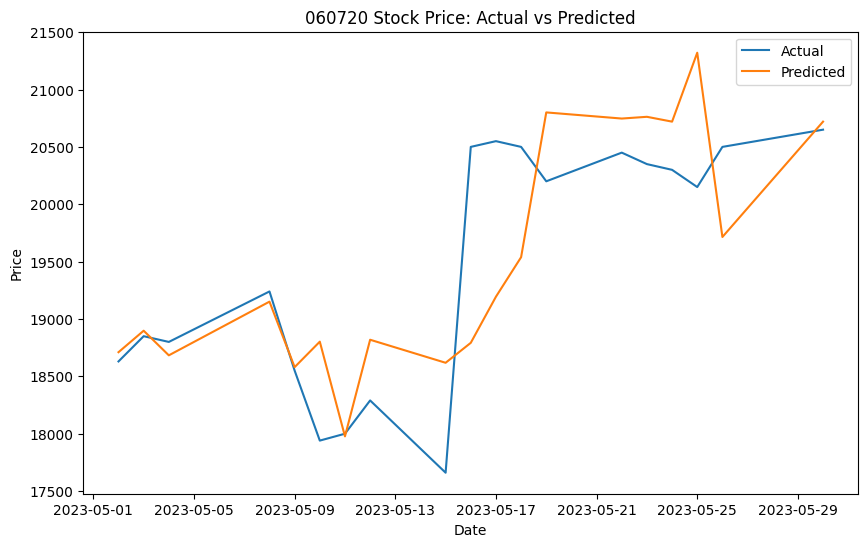

RMSE for code 060720: 741.276340508963
Training model with selected features for code 091340...
Predicting with the model for code 091340...


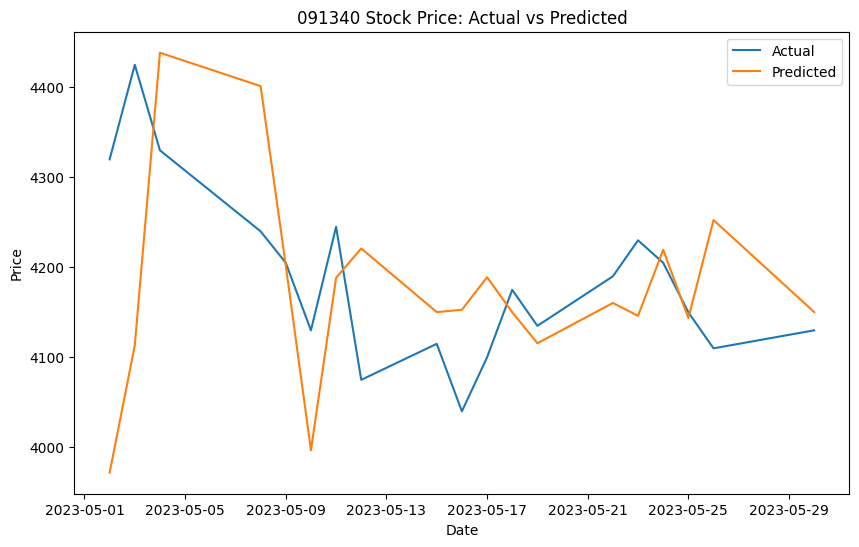

RMSE for code 091340: 135.77304445197166
Training model with selected features for code 151910...
Predicting with the model for code 151910...


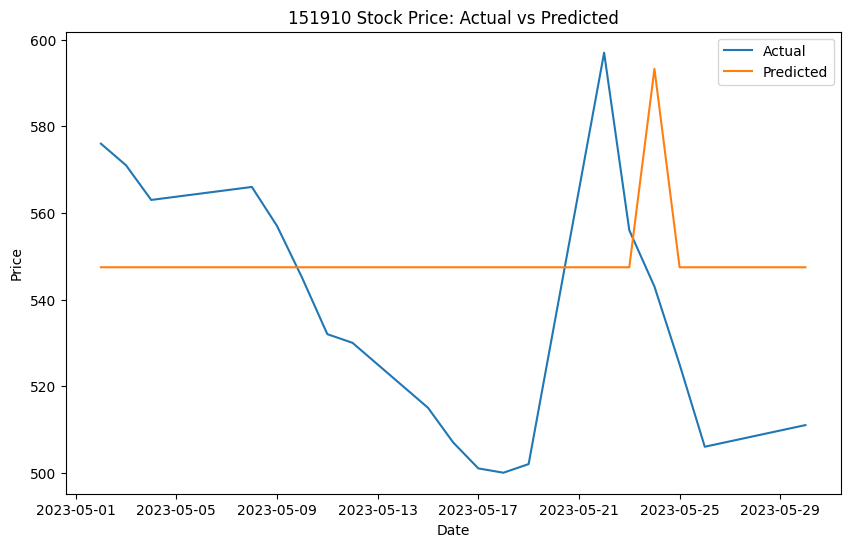

RMSE for code 151910: 32.74086335568106
Processing industry: 건설
Processing code: 056730
Training model for code 056730...
Processing code: 021320
Training model for code 021320...
Processing code: 060370
Training model for code 060370...
Processing code: 016250
Training model for code 016250...
Processing code: 066620
Training model for code 066620...
Processing code: 036190
Training model for code 036190...
Processing code: 091590
Training model for code 091590...
Processing code: 007680
Training model for code 007680...
Processing code: 025950
Training model for code 025950...
Processing code: 013120
Training model for code 013120...
Processing code: 206400
Training model for code 206400...
Processing code: 002290
Training model for code 002290...
Processing code: 042940
Training model for code 042940...
Processing code: 011370
Training model for code 011370...
Processing code: 035890
Training model for code 035890...
Processing code: 011560
Training model for code 011560...
Processi

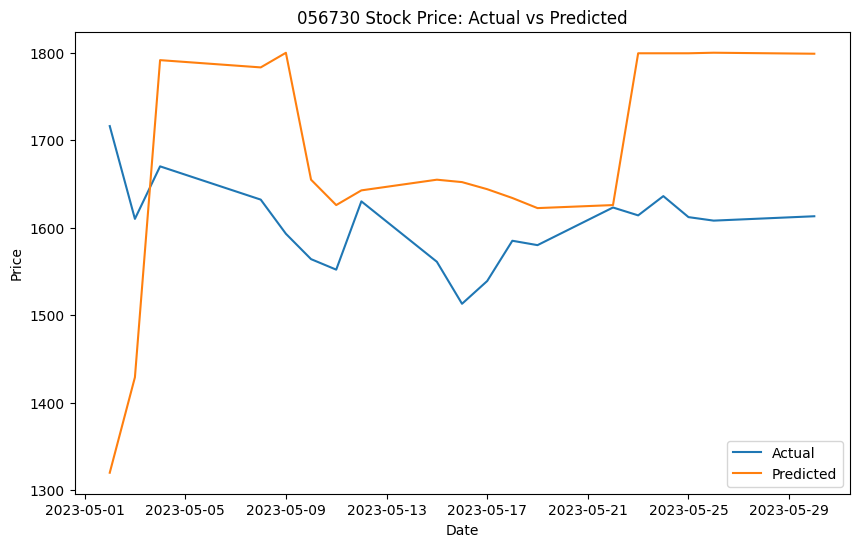

RMSE for code 056730: 161.28030110097467
Training model with selected features for code 021320...
Predicting with the model for code 021320...


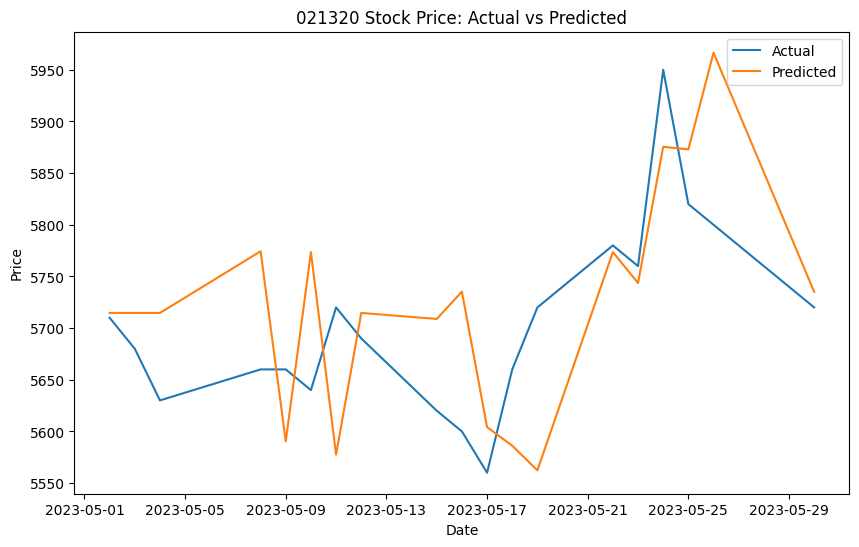

RMSE for code 021320: 91.81336355211552
Training model with selected features for code 060370...
Predicting with the model for code 060370...


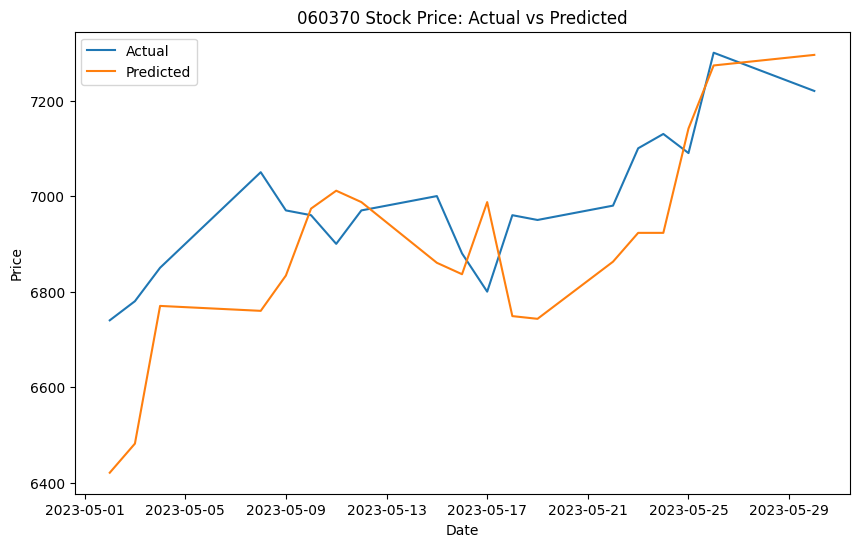

RMSE for code 060370: 170.66058926387407
Processing industry: 건설업
Processing code: 001880
Training model for code 001880...
Processing code: 375500
Training model for code 375500...
Processing code: 006360
Training model for code 006360...
Processing code: 039570
Training model for code 039570...
Processing code: 294870
Training model for code 294870...
Processing code: 097230
Training model for code 097230...
Processing code: 014790
Training model for code 014790...
Processing code: 013580
Training model for code 013580...
Processing code: 002990
Training model for code 002990...
Processing code: 013700
Training model for code 013700...
Processing code: 001260
Training model for code 001260...
Processing code: 047040
Training model for code 047040...
Processing code: 005960
Training model for code 005960...
Processing code: 028100
Training model for code 028100...
Processing code: 002410
Training model for code 002410...
Processing code: 001470
Training model for code 001470...
Proces

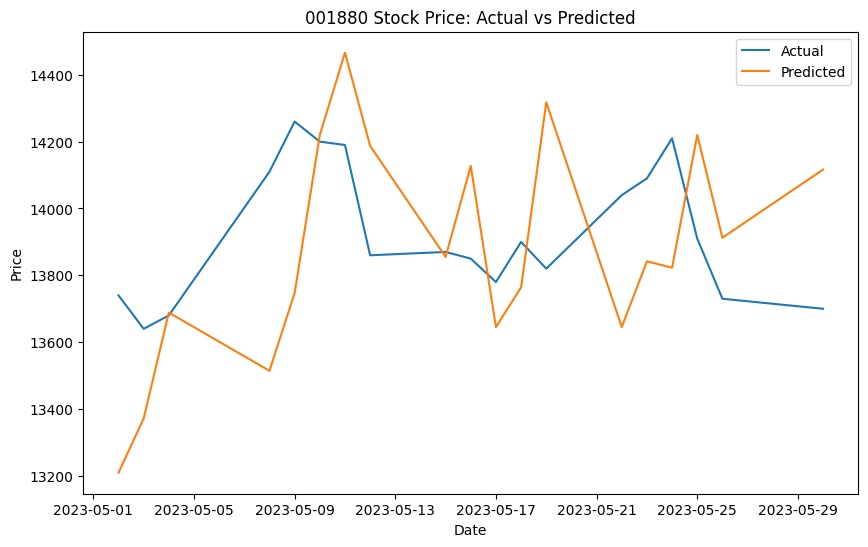

RMSE for code 001880: 339.20799570237375
Training model with selected features for code 375500...
Predicting with the model for code 375500...


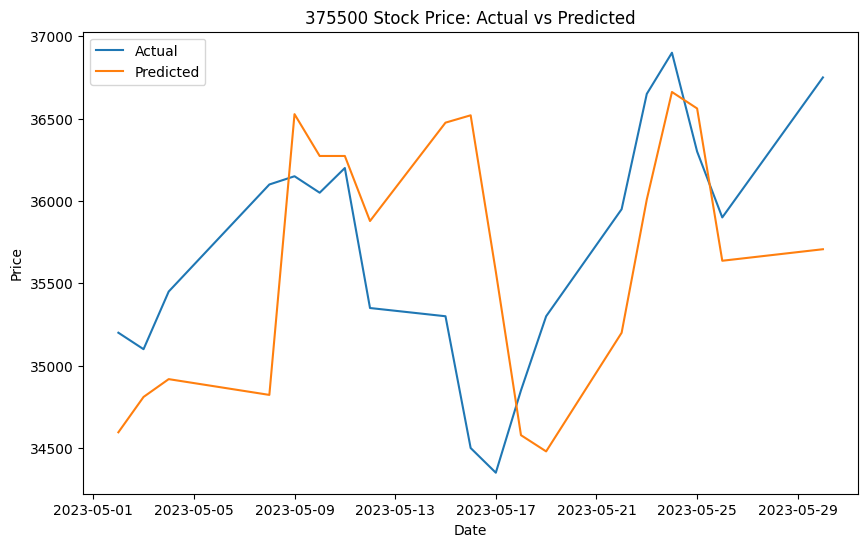

RMSE for code 375500: 820.7136514381203
Training model with selected features for code 006360...
Predicting with the model for code 006360...


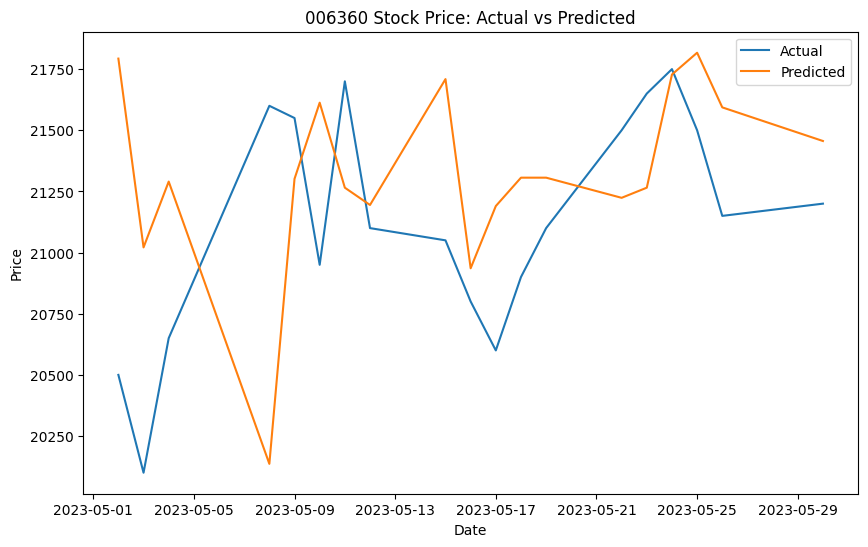

RMSE for code 006360: 622.7309534420109
Processing industry: 광업
Processing code: 003580
Training model for code 003580...
Selected features for 광업:
고가
저가
csi300_index
시가총액
Training model with selected features for code 003580...
Predicting with the model for code 003580...


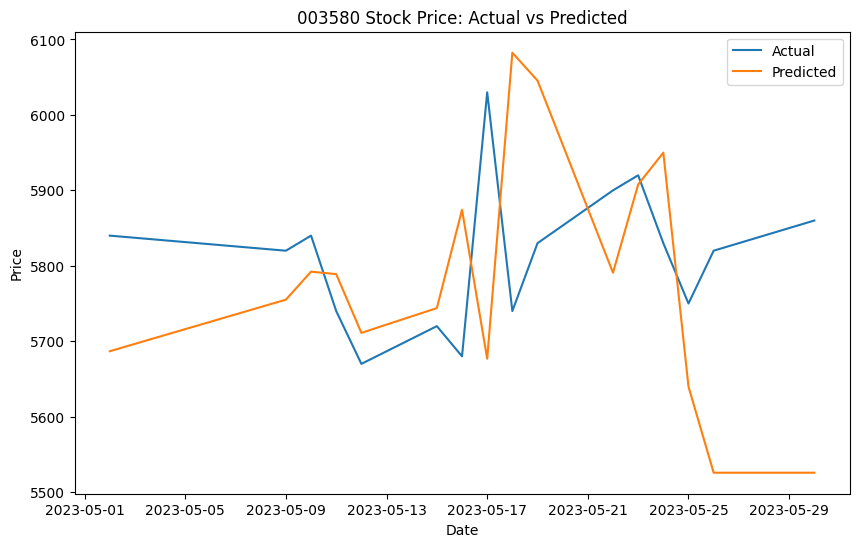

RMSE for code 003580: 193.28904529809057
Processing industry: 금속
Processing code: 024840
Training model for code 024840...
Processing code: 114190
Training model for code 114190...
Processing code: 039240
Training model for code 039240...
Processing code: 186230
Training model for code 186230...
Processing code: 053260
Training model for code 053260...
Processing code: 004780
Training model for code 004780...
Processing code: 096350
Training model for code 096350...
Processing code: 140520
Training model for code 140520...
Processing code: 090410
Training model for code 090410...
Processing code: 100130
Training model for code 100130...
Processing code: 005160
Training model for code 005160...
Processing code: 060380
Training model for code 060380...
Processing code: 109860
Training model for code 109860...
Processing code: 006910
Training model for code 006910...
Processing code: 018310
Training model for code 018310...
Processing code: 009620
Training model for code 009620...
Process

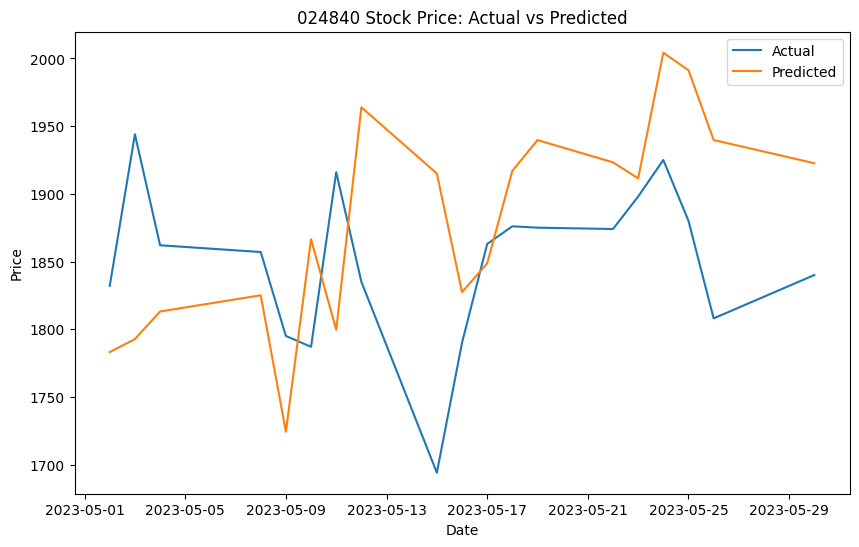

RMSE for code 024840: 95.12477720821664
Training model with selected features for code 114190...
Predicting with the model for code 114190...


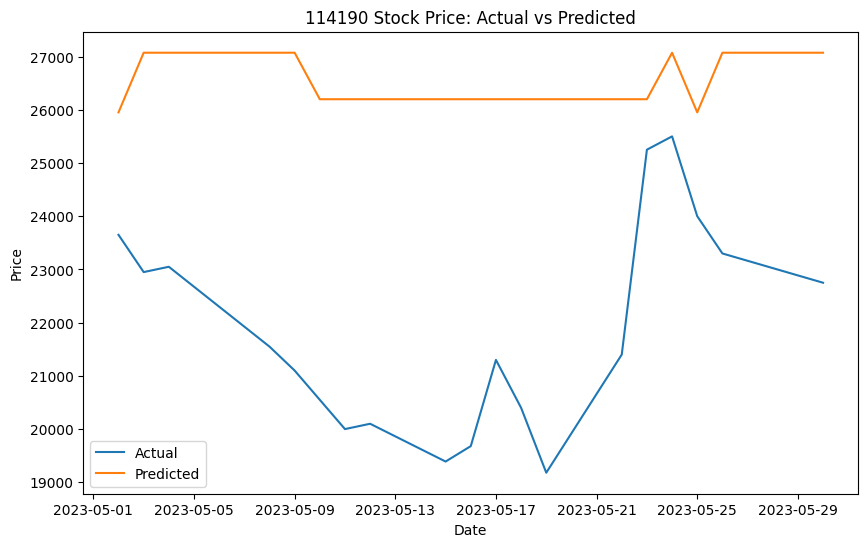

RMSE for code 114190: 4978.553814731123
Training model with selected features for code 039240...
Predicting with the model for code 039240...


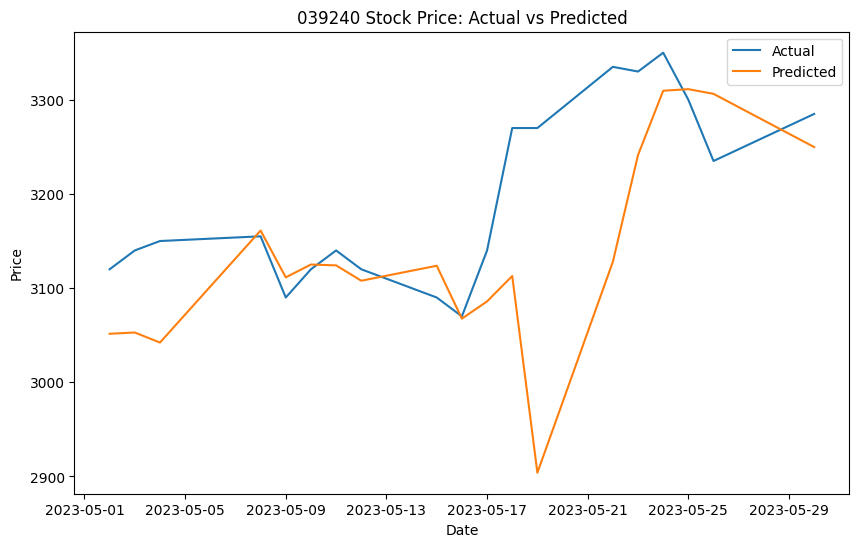

RMSE for code 039240: 113.8803067879366


In [59]:
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

industries = list(dict_data.keys())[:5]  # 첫 2개의 업종만 선택
window_size = 2  # 윈도우 사이즈를 2로 통일

for industry_index, industry in enumerate(industries):
    print(f"Processing industry: {industry}")
    codes = dict_data[industry]['종목코드'].unique()

    feature_importances = {}  # 각 피처의 중요도를 저장할 딕셔너리

    # 첫번째 단계: 각 종목코드에 대해 모델을 학습하고 피처 중요도를 평균내기
    for code_index, code in enumerate(codes):
        print(f"Processing code: {code}")
        df = dict_data[industry][dict_data[industry]['종목코드'] == code].copy()

        df['날짜'] = pd.to_datetime(df['날짜'])
        df.set_index('날짜', inplace=True)

        selected_vars = df[['종가', '시가', '고가', '저가', '거래량', '거래대금', '등락률', '종목코드', 'Close_mv5',
                            'Close_mv10', 'Close_mv20', 'OBV', 'OBV_EMA', 'sse_composite_index',
                            'csi300_index', 'usdtocny', 'eurtousd', 'msci_emerging', 'usdtoaud',
                            'usdtojpy', 'usdtokrw', 'dow', 'snp500', 'nasdaq', 'semicon_index',
                            'euro50', 'us10y_tsy', 'fast_k', 'fast_d', '시가총액', 'slow_k', 'slow_d']]

        # 윈도우 사이즈와 롤링 윈도우 적용
        moving_vars = selected_vars.rolling(window=window_size).mean().shift(1)
        moving_vars['종가'] = selected_vars['종가']

        moving_vars = moving_vars.dropna()

        train = moving_vars[moving_vars.index < '2023-05-01']
        test = moving_vars[(moving_vars.index >= '2023-05-01') & (moving_vars.index <= '2023-05-30')]

        # 테스트 데이터셋이 비어있지 않은 경우에만 모델 학습 및 예측을 수행
        if not test.empty:
            X_train = train.drop('종가', axis=1)
            y_train = train['종가']

            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)

            model = xgb.XGBRegressor(objective='reg:squarederror')

            print(f'Training model for code {code}...')
            model.fit(X_train_scaled, y_train)

            # 피처 중요도를 저장
            for i, col in enumerate(X_train.columns):
                if col not in feature_importances:
                    feature_importances[col] = []
                feature_importances[col].append(model.feature_importances_[i])

    # 피처 중요도의 평균을 구하고, 중요도가 0.1 이상인 피처만 선택
    avg_importances = {k: np.mean(v) for k, v in feature_importances.items()}
    selected_features = [k for k, v in avg_importances.items() if v > 0.1]

    # 최종 학습에 사용된 피처들을 출력
    print(f'Selected features for {industry}:')
    for feature in selected_features:
        print(feature)

    # 두번째 단계: 선택된 피처를 사용하여 해당 업종에 속하는 종목코드들 중 일부를 예측
    for code in codes[:3]:
        df = dict_data[industry][dict_data[industry]['종목코드'] == code].copy()

        df['날짜'] = pd.to_datetime(df['날짜'])
        df.set_index('날짜', inplace=True)

        moving_vars = df[selected_features + ['종가']]
        moving_vars = moving_vars.rolling(window=window_size).mean().shift(1)
        moving_vars['종가'] = df['종가']

        moving_vars = moving_vars.dropna()

        train = moving_vars[moving_vars.index < '2023-05-01']
        test = moving_vars[(moving_vars.index >= '2023-05-01') & (moving_vars.index <= '2023-05-30')]

        if not test.empty:
            X_train = train.drop('종가', axis=1)
            y_train = train['종가']
            X_test = test.drop('종가', axis=1)
            y_test = test['종가']

            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            model = xgb.XGBRegressor(objective='reg:squarederror')

            print(f'Training model with selected features for code {code}...')
            model.fit(X_train_scaled, y_train)

            print(f'Predicting with the model for code {code}...')
            predictions = model.predict(X_test_scaled)

            rmse = sqrt(mean_squared_error(y_test, predictions))

            plt.figure(figsize=(10, 6))
            plt.plot(y_test.index, y_test.values, label='Actual')
            plt.plot(y_test.index, predictions, label='Predicted')
            plt.title(f'{code} Stock Price: Actual vs Predicted')
            plt.xlabel('Date')
            plt.ylabel('Price')
            plt.legend()
            plt.show()

            print(f'RMSE for code {code}: {rmse}')


#업종별 선택할 피처들을 딕셔너리 형태로 저장  
##고가, 저가, 시가총액이 많이 보이는 이유는 무엇일까????

In [64]:
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

industries = list(dict_data.keys())  # 전체 업종 선택
window_size = 2  # 윈도우 사이즈를 2로 통일
sectors_features = {}  # 각 업종별 최종 선택된 피처들을 저장할 딕셔너리

for industry_index, industry in enumerate(industries):
    print(f"Processing industry: {industry}")
    codes = dict_data[industry]['종목코드'].unique()

    feature_importances = {}  # 각 피처의 중요도를 저장할 딕셔너리

    # 첫번째 단계: 각 종목코드에 대해 모델을 학습하고 피처 중요도를 평균내기
    for code_index, code in enumerate(codes):
        print(f"Processing code: {code}")
        df = dict_data[industry][dict_data[industry]['종목코드'] == code].copy()

        if len(df) < window_size:  # 데이터가 충분하지 않은 경우 건너뜁니다.
            print(f"Skipping code {code} due to insufficient data")
            continue

        df['날짜'] = pd.to_datetime(df['날짜'])
        df.set_index('날짜', inplace=True)

        selected_vars = df[['종가', '시가', '고가', '저가', '거래량', '거래대금', '등락률', '종목코드', 'Close_mv5',
                            'Close_mv10', 'Close_mv20', 'OBV', 'OBV_EMA', 'sse_composite_index',
                            'csi300_index', 'usdtocny', 'eurtousd', 'msci_emerging', 'usdtoaud',
                            'usdtojpy', 'usdtokrw', 'dow', 'snp500', 'nasdaq', 'semicon_index',
                            'euro50', 'us10y_tsy', 'fast_k', 'fast_d', '시가총액', 'slow_k', 'slow_d']]

        # 윈도우 사이즈와 롤링 윈도우 적용
        moving_vars = selected_vars.rolling(window=window_size).mean().shift(1)
        moving_vars['종가'] = selected_vars['종가']

        moving_vars = moving_vars.dropna()

        train = moving_vars[moving_vars.index < '2023-05-01']

        # 학습 데이터셋이 충분하지 않은 경우 건너뜁니다.
        if train.empty:
            print(f"Skipping code {code} due to insufficient train data")
            continue

        test = moving_vars[(moving_vars.index >= '2023-05-01') & (moving_vars.index <= '2023-05-30')]

        # 테스트 데이터셋이 비어있지 않은 경우에만 모델 학습 및 예측을 수행
        if not test.empty:
            X_train = train.drop('종가', axis=1)
            y_train = train['종가']

            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)

            model = xgb.XGBRegressor(objective='reg:squarederror')

            print(f'Training model for code {code}...')
            model.fit(X_train_scaled, y_train)

            # 피처 중요도를 저장
            for i, col in enumerate(X_train.columns):
                if col not in feature_importances:
                    feature_importances[col] = []
                feature_importances[col].append(model.feature_importances_[i])

    # 피처 중요도의 평균을 구하고, 중요도가 0.1 이상인 피처만 선택
    avg_importances = {k: np.mean(v) for k, v in feature_importances.items()}
    selected_features = [k for k, v in avg_importances.items() if v > 0.1]

    # 최종 학습에 사용된 피처들을 딕셔너리에 저장
    sectors_features[industry] = selected_features

    print(f'Selected features for {industry}:')
    for feature in selected_features:
        print(feature)

print("\nFinal selected features for each industry:")
for industry, features in sectors_features.items():
    print(f"Industry: {industry}, Features: {features}")


Processing industry: IT부품
Processing code: 060720
Training model for code 060720...
Processing code: 091340
Training model for code 091340...
Processing code: 151910
Training model for code 151910...
Processing code: 190510
Training model for code 190510...
Processing code: 267320
Training model for code 267320...
Processing code: 085670
Training model for code 085670...
Processing code: 068240
Training model for code 068240...
Processing code: 078600
Training model for code 078600...
Processing code: 079960
Training model for code 079960...
Processing code: 032960
Training model for code 032960...
Processing code: 066670
Training model for code 066670...
Processing code: 110990
Training model for code 110990...
Processing code: 066900
Training model for code 066900...
Processing code: 290550
Training model for code 290550...
Processing code: 300120
Training model for code 300120...
Processing code: 096640
Processing code: 257370
Skipping code 257370 due to insufficient train data
Proc

In [65]:
sectors_features

{'IT부품': ['고가', '저가', '시가총액'],
 '건설': ['고가', '저가', '시가총액'],
 '건설업': ['고가', '시가총액'],
 '광업': ['고가', '저가', 'csi300_index', '시가총액'],
 '금속': ['고가', '저가', '시가총액'],
 '금융': ['고가', '저가', '시가총액'],
 '기계': ['고가', '저가', '시가총액'],
 '기계·장비': ['고가', '시가총액'],
 '기타금융': ['고가', '저가', '시가총액'],
 '기타서비스': ['고가', '저가', '시가총액'],
 '기타제조': ['고가', 'Close_mv5', '시가총액'],
 '기타제조업': ['고가', '시가총액'],
 '농업, 임업 및 어업': ['Close_mv5', '시가총액'],
 '디지털컨텐츠': ['고가', '저가', '시가총액'],
 '반도체': ['고가', '저가', '시가총액'],
 '방송서비스': ['고가', '저가', '시가총액'],
 '보험': ['시가총액'],
 '비금속': ['고가', '저가', 'OBV', '시가총액'],
 '비금속광물': ['고가', '시가총액'],
 '서비스업': ['고가', '시가총액'],
 '섬유·의류': ['고가', 'OBV', '시가총액'],
 '섬유의복': ['저가', '시가총액'],
 '소프트웨어': ['고가', '저가', '시가총액'],
 '숙박·음식': ['저가', 'msci_emerging', '시가총액'],
 '오락·문화': ['고가', '시가총액'],
 '운송': ['고가', '저가', 'OBV', '시가총액'],
 '운송장비·부품': ['고가', '저가', '시가총액'],
 '운수장비': ['시가총액'],
 '운수창고업': ['고가', '시가총액'],
 '유통': ['고가', '저가', '시가총액'],
 '유통업': ['고가', '시가총액'],
 '은행': ['고가', '저가', 'Close_mv5', 'Close_mv20'],
 '음식료·담배': ['저가',

In [66]:
import pickle

# sectors_features 딕셔너리를 pickle 파일로 저장
with open('/content/drive/MyDrive/Colab Notebooks/sectors_features.pkl', 'wb') as f:
    pickle.dump(sectors_features, f)


In [67]:
import pandas as pd

# sectors_features 딕셔너리를 DataFrame으로 변환
df = pd.DataFrame(list(sectors_features.items()), columns=['Industry', 'Features'])

# DataFrame을 CSV 파일로 저장
df.to_csv('/content/drive/MyDrive/Colab Notebooks/sectors_features.csv', index=False)


#업종별로 선택할 피처는 정했는데... 이걸 어떻게 이용해서 순위 매길까?  
### 일단, 마지막 5일간의 평균 종가와 그 다음날의 예측종가 차이를 구해서 순위 매겨보기..... 왜??  
#### 몰라요.  5일간 평균 종가와 그 다음날의 실제 종가 차이가 클수록 많이 오른 주식으로 판단되는거 같아서..... (((( 어려운거 고려 못함 )))

In [77]:
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import pandas as pd

industries = list(dict_data.keys())  # 전체 업종 선택
window_size = 5  # 윈도우 사이즈를 5로 설정

# 각 업종에 대해 모델을 학습하고 테스트
for industry in industries:
    print(f"Processing industry: {industry}")
    codes = dict_data[industry]['종목코드'].unique()

    # 각 종목코드에 대해 모델을 학습하고 테스트
    for code in codes:
        print(f"Processing code: {code}")
        df = dict_data[industry][dict_data[industry]['종목코드'] == code].copy()

        df['날짜'] = pd.to_datetime(df['날짜'])
        df.set_index('날짜', inplace=True)

        selected_vars = df[['종가'] + sectors_features[industry]]  # 선택된 피처와 종가 사용

        # 윈도우 사이즈와 롤링 윈도우 적용
        moving_vars = selected_vars.rolling(window=window_size).mean().shift(1)

        # 예측 대상인 종가를 제외한 피처들만 사용
        moving_vars = moving_vars.drop('종가', axis=1)

        # 실제 종가를 추가
        moving_vars['종가'] = selected_vars['종가']

        moving_vars = moving_vars.dropna()

        train = moving_vars[(moving_vars.index >= '2021-06-01') & (moving_vars.index <= '2022-12-31')]
        test = moving_vars[(moving_vars.index >= '2023-05-25') & (moving_vars.index <= '2023-05-29')]

        # 테스트 데이터셋이 비어있지 않은 경우에만 모델 학습 및 예측을 수행
        if not test.empty:
            X_train = train.drop('종가', axis=1)
            y_train = train['종가']
            X_test = test.drop('종가', axis=1)
            y_test = test['종가']

            scaler = MinMaxScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            model = xgb.XGBRegressor(objective='reg:squarederror')

            print(f'Training model for code {code}...')
            model.fit(X_train_scaled, y_train)

            print(f'Predicting for code {code}...')
            predictions = model.predict(X_test_scaled)

            # 5월30일의 예측 종가와 5일간의 평균 종가 차이 계산
            average_close = y_test.mean()
            difference = average_close - predictions[-1]

            print(f"Code: {code}, Predicted Close on May 30: {predictions[-1]}, Average Close from May 25 to May 29: {average_close}, Difference: {difference}")

            # 결과를 데이터프레임에 추가
            result_row = pd.DataFrame({'종목코드': [code], 'Difference': [difference]})
            result_row['Rank'] = result_row['Difference'].rank(ascending=False)

            if 'result_df' in locals():
                result_df = pd.concat([result_df, result_row])
            else:
                result_df = result_row

# 결과를 데이터프레임을 CSV 파일로 저장
result_df.to_csv('result.csv', index=False)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Predicting for code 002150...
Code: 002150, Predicted Close on May 30: 10544.9609375, Average Close from May 25 to May 29: 8725.0, Difference: -1819.9609375
Processing code: 102260
Training model for code 102260...
Predicting for code 102260...
Code: 102260, Predicted Close on May 30: 4675.04638671875, Average Close from May 25 to May 29: 4605.0, Difference: -70.04638671875
Processing code: 032350
Training model for code 032350...
Predicting for code 032350...
Code: 032350, Predicted Close on May 30: 12298.8916015625, Average Close from May 25 to May 29: 11260.0, Difference: -1038.8916015625
Processing code: 286940
Training model for code 286940...
Predicting for code 286940...
Code: 286940, Predicted Close on May 30: 27400.759765625, Average Close from May 25 to May 29: 27900.0, Difference: 499.240234375
Processing code: 007120
Training model for code 007120...
Predicting for code 007120...
Code: 007120, Predicted Close on May 30: 1923.95166015625, 

In [78]:
result_df

,종목코드,Difference,Rank
0,060720,-387.226562,1.0
0,060720,-387.226562,1.0
0,091340,-151.173340,1.0
0,151910,-393.990112,1.0
0,190510,1045.368164,1.0
...,...,...,...
0,298050,24700.687500,1.0
0,298020,4409.437500,1.0
0,298000,60.835938,1.0
0,093370,-339.788086,1.0


In [79]:
result_df_unique = result_df.drop_duplicates(subset='종목코드')


In [80]:
result_df_unique

,종목코드,Difference,Rank
0,060720,-387.226562,1.0
0,091340,-151.173340,1.0
0,151910,-393.990112,1.0
0,190510,1045.368164,1.0
0,267320,25.896729,1.0
...,...,...,...
0,298050,24700.687500,1.0
0,298020,4409.437500,1.0
0,298000,60.835938,1.0
0,093370,-339.788086,1.0


#순위매기기 > 주가대비변동률을 반영하지 않음

In [124]:
result_df2 = result_df_unique

In [125]:
result_df2['Rank'] = result_df2['Difference'].rank(ascending=False).astype(int)
result_df2

<ipython-input-125-bb4a5b0cf86b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df2['Rank'] = result_df2['Difference'].rank(ascending=False).astype(int)


,종목코드,Difference,Rank,rank
0,060720,-387.226562,1524,1
0,091340,-151.173340,1268,1
0,151910,-393.990112,1530,1
0,190510,1045.368164,235,1
0,267320,25.896729,810,1
...,...,...,...,...
0,298050,24700.687500,20,1
0,298020,4409.437500,88,1
0,298000,60.835938,718,1
0,093370,-339.788086,1490,1


In [117]:
result_df2 = result_df2.drop(['Difference', 'rank'], axis=1)
result_df2

,종목코드,Rank
0,060720,1524
0,091340,1268
0,151910,1530
0,190510,235
0,267320,810
...,...,...
0,298050,20
0,298020,88
0,298000,718
0,093370,1490


In [118]:
result_df2['종목코드'] = 'A' + result_df2['종목코드'].astype(str)
result_df2

,종목코드,Rank
0,A060720,1524
0,A091340,1268
0,A151910,1530
0,A190510,235
0,A267320,810
...,...,...
0,A298050,20
0,A298020,88
0,A298000,718
0,A093370,1490


In [119]:
result_df2.rename(columns={'Rank': '순위'}, inplace=True)
result_df2

,종목코드,순위
0,A060720,1524
0,A091340,1268
0,A151910,1530
0,A190510,235
0,A267320,810
...,...,...
0,A298050,20
0,A298020,88
0,A298000,718
0,A093370,1490


In [120]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')
sample_submission

,종목코드,순위
0,A000020,1
1,A000040,2
2,A000050,3
3,A000070,4
4,A000080,5
...,...,...
1995,A375500,1996
1996,A378850,1997
1997,A383220,1998
1998,A383310,1999


In [121]:
baseline_submission = sample_submission[['종목코드']].merge(result_df2[['종목코드', '순위']], on='종목코드', how='left')
baseline_submission
baseline_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/0719_XGBoost.csv', index=False)

In [122]:
baseline_submission

,종목코드,순위
0,A000020,654
1,A000040,932
2,A000050,1689
3,A000070,1265
4,A000080,1823
...,...,...
1995,A375500,486
1996,A378850,461
1997,A383220,238
1998,A383310,1848


In [129]:
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import pandas as pd

industries = list(dict_data.keys())  # 전체 업종 선택
window_size = 5  # 윈도우 사이즈를 5로 설정

result_df = pd.DataFrame()  # 결과를 저장할 데이터프레임 초기화

# 각 업종에 대해 모델을 학습하고 테스트
for industry in industries:
    print(f"Processing industry: {industry}")
    codes = dict_data[industry]['종목코드'].unique()

    # 각 종목코드에 대해 모델을 학습하고 테스트
    for code in codes:
        print(f"Processing code: {code}")
        df = dict_data[industry][dict_data[industry]['종목코드'] == code].copy()

        df['날짜'] = pd.to_datetime(df['날짜'])
        df.set_index('날짜', inplace=True)

        selected_vars = df[['종가'] + sectors_features[industry]]  # 선택된 피처와 종가 사용

        # 윈도우 사이즈와 롤링 윈도우 적용
        moving_vars = selected_vars.rolling(window=window_size).mean().shift(1)

        # 예측 대상인 종가를 제외한 피처들만 사용
        moving_vars = moving_vars.drop('종가', axis=1)

        # 실제 종가를 추가
        moving_vars['종가'] = selected_vars['종가']

        moving_vars = moving_vars.dropna()

        train = moving_vars[(moving_vars.index >= '2021-06-01') & (moving_vars.index <= '2022-12-31')]
        test = moving_vars[(moving_vars.index >= '2023-05-25') & (moving_vars.index <= '2023-05-29')]

        # 테스트 데이터셋이 비어있지 않은 경우에만 모델 학습 및 예측을 수행
        if not test.empty:
            X_train = train.drop('종가', axis=1)
            y_train = train['종가']
            X_test = test.drop('종가', axis=1)
            y_test = test['종가']

            scaler = MinMaxScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            model = xgb.XGBRegressor(objective='reg:squarederror')

            print(f'Training model for code {code}...')
            model.fit(X_train_scaled, y_train)

            print(f'Predicting for code {code}...')
            predictions = model.predict(X_test_scaled)

            # 5월30일의 예측 종가와 5일간의 평균 종가 차이 계산
            average_close = y_test.mean()
            difference = average_close - predictions[-1]

            print(f"Code: {code}, Predicted Close on May 30: {predictions[-1]}, Average Close from May 25 to May 29: {average_close}, Difference: {difference}")

            # 결과를 데이터프레임에 추가
            result_row = pd.DataFrame({'종목코드': [code], 'Difference': [difference], '예측종가_5월30일': [predictions[-1]]})
            result_row['Rank'] = result_row['Difference'].rank(ascending=False)

            result_df = pd.concat([result_df, result_row])

# 결과를 데이터프레임을 CSV 파일로 저장
result_df.to_csv('result.csv', index=False)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Predicting for code 002150...
Code: 002150, Predicted Close on May 30: 10544.9609375, Average Close from May 25 to May 29: 8725.0, Difference: -1819.9609375
Processing code: 102260
Training model for code 102260...
Predicting for code 102260...
Code: 102260, Predicted Close on May 30: 4675.04638671875, Average Close from May 25 to May 29: 4605.0, Difference: -70.04638671875
Processing code: 032350
Training model for code 032350...
Predicting for code 032350...
Code: 032350, Predicted Close on May 30: 12298.8916015625, Average Close from May 25 to May 29: 11260.0, Difference: -1038.8916015625
Processing code: 286940
Training model for code 286940...
Predicting for code 286940...
Code: 286940, Predicted Close on May 30: 27400.759765625, Average Close from May 25 to May 29: 27900.0, Difference: 499.240234375
Processing code: 007120
Training model for code 007120...
Predicting for code 007120...
Code: 007120, Predicted Close on May 30: 1923.95166015625, 

In [130]:

# 주가 대비 변동률 계산
result_df['주가대비변동률'] = result_df['Difference'] / result_df['예측종가_5월30일']


# 순위 매기기
result_df['순위'] = result_df['주가대비변동률'].rank(ascending=False)

# 결과를 CSV 파일로 저장
result_df.to_csv('result_with_rank.csv', index=False)


In [131]:
result_df

,종목코드,Difference,예측종가_5월30일,Rank,주가대비변동률,순위
0,060720,-387.226562,20712.226562,1.0,-0.018696,1183.0
0,091340,-151.173340,4281.173340,1.0,-0.035311,1415.0
0,151910,-393.990112,909.490112,1.0,-0.433199,1990.0
0,190510,1045.368164,15009.631836,1.0,0.069646,270.0
0,267320,25.896729,3429.103271,1.0,0.007552,770.0
...,...,...,...,...,...,...
0,298050,24700.687500,422299.312500,1.0,0.058491,324.0
0,298020,4409.437500,382590.562500,1.0,0.011525,715.0
0,298000,60.835938,100339.164062,1.0,0.000606,876.0
0,093370,-339.788086,13359.788086,1.0,-0.025434,1283.0


In [132]:
result_df.drop(['Difference', '예측종가_5월30일', 'Rank', '주가대비변동률'], axis=1, inplace=True)
result_df['종목코드'] = 'A' + result_df['종목코드']
result_df['순위'] = result_df['순위'].astype(int)


In [135]:
result_df

,종목코드,순위
0,A060720,1183
0,A091340,1415
0,A151910,1990
0,A190510,270
0,A267320,770
...,...,...
0,A298050,324
0,A298020,715
0,A298000,876
0,A093370,1283


In [141]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')
sample_submission

,종목코드,순위
0,A000020,1
1,A000040,2
2,A000050,3
3,A000070,4
4,A000080,5
...,...,...
1995,A375500,1996
1996,A378850,1997
1997,A383220,1998
1998,A383310,1999


In [137]:
baseline_submission = sample_submission[['종목코드']].merge(result_df[['종목코드', '순위']], on='종목코드', how='left')
baseline_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/주가대비변동률반영_0719_XGBoost.csv', index=False)
baseline_submission

In [138]:
baseline_submission

,종목코드,순위
0,A000020,737
1,A000040,1038
2,A000050,1693
3,A000070,942
4,A000080,1658
...,...,...
1995,A375500,788
1996,A378850,279
1997,A383220,767
1998,A383310,1332


#주가대비변동률 적은 순위 => 땡

In [139]:
baseline_submission['순위'] = 2001 - baseline_submission['순위']
baseline_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/주가대비변동률반영_역순_0719_XGBoost.csv', index=False)


In [140]:
baseline_submission

,종목코드,순위
0,A000020,1264
1,A000040,963
2,A000050,308
3,A000070,1059
4,A000080,343
...,...,...
1995,A375500,1213
1996,A378850,1722
1997,A383220,1234
1998,A383310,669


#주가대비변동률이 적으면서 5일간 평균 종가와 예측 종가 차이가 양수인 경우를 기준으로 순위를 매겨보기 => 땡

In [172]:
result_df = pd.read_csv('result_with_rank.csv')
result_df


,종목코드,Difference,예측종가_5월30일,Rank,주가대비변동률,순위
0,60720,-387.226562,20712.2270,1.0,-0.018696,1183.0
1,91340,-151.173340,4281.1733,1.0,-0.035311,1415.0
2,151910,-393.990112,909.4901,1.0,-0.433199,1990.0
3,190510,1045.368164,15009.6320,1.0,0.069646,270.0
4,267320,25.896729,3429.1033,1.0,0.007552,770.0
...,...,...,...,...,...,...
1995,298050,24700.687500,422299.3000,1.0,0.058491,324.0
1996,298020,4409.437500,382590.5600,1.0,0.011525,715.0
1997,298000,60.835938,100339.1640,1.0,0.000606,876.0
1998,93370,-339.788086,13359.7880,1.0,-0.025434,1283.0


In [173]:
result_df_sorted = result_df.sort_values('순위', ascending=True)
result_df_sorted.head(50)


,종목코드,Difference,예측종가_5월30일,Rank,주가대비변동률,순위
205,86520,406824.718750,137675.2800,1.0,2.954958,1.0
1442,234920,15966.126465,5458.8735,1.0,2.924802,2.0
1418,317770,56848.414062,19551.5860,1.0,2.907611,3.0
1667,6740,14562.578125,5512.4220,1.0,2.641775,4.0
278,277810,71261.873047,30988.1270,1.0,2.299651,5.0
617,96610,15866.197266,8433.8030,1.0,1.881263,6.0
1965,5070,110922.101562,67127.9000,1.0,1.652399,7.0
181,9520,14897.680664,9527.3190,1.0,1.563680,8.0
872,58970,31718.111328,20431.8890,1.0,1.552383,9.0
1701,2710,19987.778320,13812.2220,1.0,1.447108,10.0


#하위200개 골라내기 ( +상위200개 골라내서 합치고, 나머지것들은 랜덤 순위)

In [174]:
#주가대비변동률이 음수이고 5일간 평균 종가와 예측 종가의 차이가 큰 마이너스 값을 하위200개에 배치하고자 함
# 주가대비변동률이 음수이고 5일간 평균 종가와 예측 종가의 차이가 큰 마이너스 값인 경우를 선택
filtered_df = result_df[(result_df['주가대비변동률'] < 0) & (result_df['Difference'] < 0)]

# 순위를 매기기 위해 'Difference' 컬럼을 기준으로 내림차순 정렬
filtered_df = filtered_df.sort_values('Difference', ascending=False)

# 순위 컬럼 추가 및 순위 매김
filtered_df['순위'] = filtered_df['Difference'].rank(ascending=False)

# 결과 확인
print(filtered_df[['종목코드', 'Difference', '순위']])


        종목코드    Difference      순위
506    32860     -0.000977     1.0
342   226440     -0.011597     2.0
1140   57880     -0.023682     3.0
1300  269620     -0.043091     4.0
1317  150840     -0.044922     5.0
...      ...           ...     ...
1461   17390 -45637.140625  1099.0
1973    3240 -47927.375000  1100.0
936     3100 -50362.195312  1101.0
1846   51900 -51565.750000  1102.0
1702   10130 -72322.625000  1103.0

[1103 rows x 3 columns]


In [175]:
# down 200에 하위 200개 저장
down_200 = filtered_df.tail(200)

# down 200의 순위를 다시 매김
down_200['Rank'] = range(1801, 2001)

# 최종 순위를 오름차순으로 정렬
final_ranking = pd.concat([filtered_df.head(len(filtered_df) - 200), down_200])

# 최종 순위를 하위 200개만 저장
final_ranking = final_ranking.tail(200)

# 결과 확인
final_ranking


<ipython-input-175-7460fe3fb49e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  down_200['Rank'] = range(1801, 2001)


,종목코드,Difference,예측종가_5월30일,Rank,주가대비변동률,순위
1423,270660,-1403.246094,17223.246,1801.0,-0.081474,904.0
1991,48410,-1405.691406,24030.691,1802.0,-0.058496,905.0
564,293490,-1406.664062,40031.664,1803.0,-0.035139,906.0
1532,129890,-1412.347168,6059.847,1804.0,-0.233066,907.0
91,16250,-1415.105469,26765.105,1805.0,-0.052871,908.0
...,...,...,...,...,...,...
1461,17390,-45637.140625,130037.140,1996.0,-0.350955,1099.0
1973,3240,-47927.375000,709927.400,1997.0,-0.067510,1100.0
936,3100,-50362.195312,76137.195,1998.0,-0.661466,1101.0
1846,51900,-51565.750000,608565.750,1999.0,-0.084733,1102.0


In [177]:
final_ranking['Rank'] = final_ranking['Rank'].astype(int)
final_ranking

,종목코드,Difference,예측종가_5월30일,Rank,주가대비변동률,순위
1423,270660,-1403.246094,17223.246,1801,-0.081474,904
1991,48410,-1405.691406,24030.691,1802,-0.058496,905
564,293490,-1406.664062,40031.664,1803,-0.035139,906
1532,129890,-1412.347168,6059.847,1804,-0.233066,907
91,16250,-1415.105469,26765.105,1805,-0.052871,908
...,...,...,...,...,...,...
1461,17390,-45637.140625,130037.140,1996,-0.350955,1099
1973,3240,-47927.375000,709927.400,1997,-0.067510,1100
936,3100,-50362.195312,76137.195,1998,-0.661466,1101
1846,51900,-51565.750000,608565.750,1999,-0.084733,1102


In [178]:
# Difference, 예측종가_5월30일, Rank, 주가대비변동률, 순위 컬럼 제거
final_ranking = final_ranking.drop(['Difference', '예측종가_5월30일','주가대비변동률', '순위'], axis=1)

# 결과 확인
final_ranking


,종목코드,Rank
1423,270660,1801
1991,48410,1802
564,293490,1803
1532,129890,1804
91,16250,1805
...,...,...
1461,17390,1996
1973,3240,1997
936,3100,1998
1846,51900,1999


In [179]:
final_ranking['종목코드'] = final_ranking['종목코드'].astype(str).str.zfill(6)
final_ranking['종목코드'] = np.where(final_ranking['종목코드'].str.len() == 6, 'A' + final_ranking['종목코드'], final_ranking['종목코드'])
final_ranking

,종목코드,Rank
1423,A270660,1801
1991,A048410,1802
564,A293490,1803
1532,A129890,1804
91,A016250,1805
...,...,...
1461,A017390,1996
1973,A003240,1997
936,A003100,1998
1846,A051900,1999


In [190]:
final_ranking.rename(columns={'Rank': '순위'}, inplace=True)


#상위200개 출력

In [181]:
# 주가대비변동률에 대한 조건 포함해서 5일간 평균 종가와 예측 종가 차이가 양수인것들 기준으로 순위매겨서 상위200개만 추출
# threshold를 적게 할수록 주가의 안정성이 높은 종목들이 상위권에 포함될 가능성이 높아짐

threshold = 0.1
result_df['rank'] = result_df[(result_df['주가대비변동률'] < threshold) & (result_df['Difference'] > 0)].rank(ascending=False)['Difference']


In [182]:
# NaN 값을 가진 rank를 하위로 배치하고, rank를 오름차순으로 정렬
result_df['rank'] = result_df['rank'].fillna(result_df['rank'].max() + 1)
result_df['rank'] = result_df['rank'].astype(int)
result_df = result_df.sort_values(by='rank')

# 결과 확인
result_df.head(50)


,종목코드,Difference,예측종가_5월30일,Rank,주가대비변동률,순위,rank
1246,A003920,29632.843750,477867.160,1.0,0.062011,309.0,1
1995,A298050,24700.687500,422299.300,1.0,0.058491,324.0,2
1698,A005490,20591.750000,342158.250,1.0,0.060182,317.0,3
796,A352820,13319.484375,255180.520,1.0,0.052196,360.0,4
1328,A140860,11729.250000,142920.750,1.0,0.082068,230.0,5
387,A003030,8882.687500,159717.310,1.0,0.055615,341.0,6
814,A001460,8819.187500,414930.800,1.0,0.021255,597.0,7
1847,A051910,7561.187500,701438.800,1.0,0.010780,728.0,8
1854,A011790,6943.515625,88256.484,1.0,0.078674,241.0,9
1478,A361610,5737.710938,83312.290,1.0,0.068870,273.0,10


In [183]:
# 상위 200개 행만 유지하고 나머지 행은 제거
result_df = result_df.head(200)
result_df

,종목코드,Difference,예측종가_5월30일,Rank,주가대비변동률,순위,rank
1246,A003920,29632.843750,477867.160,1.0,0.062011,309.0,1
1995,A298050,24700.687500,422299.300,1.0,0.058491,324.0,2
1698,A005490,20591.750000,342158.250,1.0,0.060182,317.0,3
796,A352820,13319.484375,255180.520,1.0,0.052196,360.0,4
1328,A140860,11729.250000,142920.750,1.0,0.082068,230.0,5
...,...,...,...,...,...,...,...
1139,A051380,474.505859,6880.494,1.0,0.068964,272.0,196
1929,A018250,471.830078,22253.170,1.0,0.021203,598.0,197
1909,A018290,471.791016,5808.209,1.0,0.081228,234.0,198
1436,A044340,470.975586,10859.024,1.0,0.043372,408.0,199


In [184]:
# Difference, 예측종가_5월30일, Rank, 주가대비변동률, 순위 컬럼 제거
result_df = result_df.drop(['Difference', '예측종가_5월30일', 'Rank', '주가대비변동률', '순위'], axis=1)

# 결과 확인
result_df


,종목코드,rank
1246,A003920,1
1995,A298050,2
1698,A005490,3
796,A352820,4
1328,A140860,5
...,...,...
1139,A051380,196
1929,A018250,197
1909,A018290,198
1436,A044340,199


In [185]:
result_df['종목코드'] = result_df['종목코드'].astype(str).str.zfill(6)
result_df['종목코드'] = np.where(result_df['종목코드'].str.len() == 6, 'A' + result_df['종목코드'], result_df['종목코드'])
result_df

,종목코드,rank
1246,A003920,1
1995,A298050,2
1698,A005490,3
796,A352820,4
1328,A140860,5
...,...,...
1139,A051380,196
1929,A018250,197
1909,A018290,198
1436,A044340,199


In [188]:
result_df.rename(columns={'rank': '순위'}, inplace=True)
result_df

,종목코드,순위
1246,A003920,1
1995,A298050,2
1698,A005490,3
796,A352820,4
1328,A140860,5
...,...,...
1139,A051380,196
1929,A018250,197
1909,A018290,198
1436,A044340,199


#제출용파일 만들기


In [199]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')
sample_submission

,종목코드,순위
0,A000020,1
1,A000040,2
2,A000050,3
3,A000070,4
4,A000080,5
...,...,...
1995,A375500,1996
1996,A378850,1997
1997,A383220,1998
1998,A383310,1999


In [200]:
# final_ranking에서 종목코드와 순위 컬럼 선택
final_ranking_subset = final_ranking[['종목코드', '순위']]

# sample_submission에 final_ranking 순위 병합
sample_submission = pd.merge(sample_submission, final_ranking_subset, on='종목코드', how='left')

# 병합된 순위 컬럼명을 수정
sample_submission.rename(columns={'순위': '순위_final_ranking'}, inplace=True)

# 결과 확인
sample_submission


,종목코드,순위_x,순위_y
0,A000020,1,NaN
1,A000040,2,NaN
2,A000050,3,NaN
3,A000070,4,NaN
4,A000080,5,1823.0
...,...,...,...
1995,A375500,1996,NaN
1996,A378850,1997,NaN
1997,A383220,1998,NaN
1998,A383310,1999,1848.0


In [201]:
# result_df에서 종목코드와 순위 컬럼 선택
result_df_subset = result_df[['종목코드', '순위']]

# sample_submission에 result_df 순위 병합
sample_submission = pd.merge(sample_submission, result_df_subset, on='종목코드', how='left')

# 병합된 순위 컬럼명을 수정
sample_submission.rename(columns={'순위': '순위_result_df'}, inplace=True)

# 결과 확인
sample_submission


,종목코드,순위_x,순위_y,순위_result_df
0,A000020,1,NaN,NaN
1,A000040,2,NaN,NaN
2,A000050,3,NaN,NaN
3,A000070,4,NaN,NaN
4,A000080,5,1823.0,NaN
...,...,...,...,...
1995,A375500,1996,NaN,NaN
1996,A378850,1997,NaN,NaN
1997,A383220,1998,NaN,105.0
1998,A383310,1999,1848.0,NaN


In [202]:
# '순위_y'와 '순위_result_df' 컬럼의 NaN을 0으로 채우기
sample_submission['순위_y'].fillna(0, inplace=True)
sample_submission['순위_result_df'].fillna(0, inplace=True)

# 결과 확인
sample_submission


,종목코드,순위_x,순위_y,순위_result_df
0,A000020,1,0.0,0.0
1,A000040,2,0.0,0.0
2,A000050,3,0.0,0.0
3,A000070,4,0.0,0.0
4,A000080,5,1823.0,0.0
...,...,...,...,...
1995,A375500,1996,0.0,0.0
1996,A378850,1997,0.0,0.0
1997,A383220,1998,0.0,105.0
1998,A383310,1999,1848.0,0.0


In [203]:
# '순위_y'와 '순위_result_df' 컬럼을 더한 값을 '순위' 컬럼에 추가
sample_submission['순위'] = sample_submission['순위_y'] + sample_submission['순위_result_df']

# 결과 확인
sample_submission


,종목코드,순위_x,순위_y,순위_result_df,순위
0,A000020,1,0.0,0.0,0.0
1,A000040,2,0.0,0.0,0.0
2,A000050,3,0.0,0.0,0.0
3,A000070,4,0.0,0.0,0.0
4,A000080,5,1823.0,0.0,1823.0
...,...,...,...,...,...
1995,A375500,1996,0.0,0.0,0.0
1996,A378850,1997,0.0,0.0,0.0
1997,A383220,1998,0.0,105.0,105.0
1998,A383310,1999,1848.0,0.0,1848.0


In [204]:
# '순위_x', '순위_y', '순위_result_df' 컬럼 삭제
sample_submission.drop(['순위_x', '순위_y', '순위_result_df'], axis=1, inplace=True)

# 결과 확인
sample_submission


,종목코드,순위
0,A000020,0.0
1,A000040,0.0
2,A000050,0.0
3,A000070,0.0
4,A000080,1823.0
...,...,...
1995,A375500,0.0
1996,A378850,0.0
1997,A383220,105.0
1998,A383310,1848.0


In [209]:
# '순위' 컬럼에서 0의 개수 카운트
zero_count = sample_submission['순위'].eq(0).sum()

print(zero_count)


1600


In [210]:
# '순위' 컬럼을 int형으로 변환
sample_submission['순위'] = sample_submission['순위'].astype(int)

# '순위' 컬럼에 0이 포함된 행들에 201부터 1800까지의 숫자를 넣어줌
mask = sample_submission['순위'] == 0
sample_submission.loc[mask, '순위'] = range(201, 1801)

# 결과 확인
sample_submission


,종목코드,순위
0,A000020,201
1,A000040,202
2,A000050,203
3,A000070,204
4,A000080,1823
...,...,...
1995,A375500,1798
1996,A378850,1799
1997,A383220,105
1998,A383310,1848


In [212]:
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/이게맞나_0720_XGBoost.csv', index=False)
sample_submission

,종목코드,순위
0,A000020,201
1,A000040,202
2,A000050,203
3,A000070,204
4,A000080,1823
...,...,...
1995,A375500,1798
1996,A378850,1799
1997,A383220,105
1998,A383310,1848
